# **Project: Investigate a Dataset-No ShowAppointments**



**Table of contents**

Introduction

Data Wrangling

Exploratory Data Analysis

Conclusion

**Introduction**

**Dataset Description**

The No-Show appointment dataset contains data of medical appointments in Brazil. The dataset is stored in a csv file  **'noshowappointment.csv'**. The dataset consists of 1 table with 110527 records and 14 columns. The columns in the dataset include:
PatientID
AppointmentId
Gender
ScheduledDay
AppointmentDay
Age
Neighborhood
Scholarship
Hypertension
Diabetes
Alcoholism
Handicap
SMS_received
No-show

**Question(s) for Analysis**

1. What factors are important in predicting whether or not a patient will show up for their scheduled appointment?
2. Does neighbourhood indicate if a patient will show up or not for an appointment?
3. Do patients on scholarship tend to show up more for appointments than others?
4. Are no-show appointment associated with a certain gender?

Packages used to investigate the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

Data Wrangling

In [2]:
df = pd.read_csv(r'C:\Users\Emy\Downloads\noshowappointments.csv', sep = ',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


check for duplicates

In [4]:
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


This means there are no duplicate rows.

checking for number of null values in the dataset.

In [5]:
sum([True for idx, row  in df.iterrows() if any(row.isnull())])

0

Lets rename some columns

In [6]:
df.rename(columns = {'No-show':'NoShow'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data Exploration

The next cell shows the number of patients that showed up for their appointments. Note that in the NoShow column, "No" represents those that showed up and "Yes" represents those that did not show up.

In [7]:
df_showup = df.query('NoShow == "No"')
df_showup.count()

PatientId         88208
AppointmentID     88208
Gender            88208
ScheduledDay      88208
AppointmentDay    88208
Age               88208
Neighbourhood     88208
Scholarship       88208
Hipertension      88208
Diabetes          88208
Alcoholism        88208
Handcap           88208
SMS_received      88208
NoShow            88208
dtype: int64

The output shows that out of the 110527 patients, 88208 showed up for their appointments.

Lets see the number of patients that did not show up.

In [8]:
df_nshowup = df.query('NoShow == "Yes"')
df_nshowup.count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hipertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
NoShow            22319
dtype: int64

From the above output, 22319 did not show up for their appointments. The histogram below is used to show number of patients that showed up and those that did not show up for thir appointments.

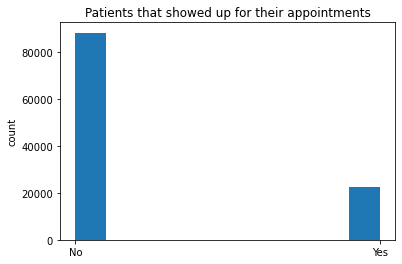

In [9]:
plt.hist(df.NoShow)
plt.title('Patients that showed up for their appointments')
plt.ylabel('count')
plt.show()

To check the number of patients that showed up from each neighbourhood.

In [10]:
showup_count = df_showup.Neighbourhood.value_counts().reset_index(name ='NoShow')
print(showup_count)

                index  NoShow
0      JARDIM CAMBURI    6252
1         MARIA ORTIZ    4586
2         RESISTÊNCIA    3525
3     JARDIM DA PENHA    3246
4        SANTA MARTHA    2635
..                ...     ...
75  PONTAL DE CAMBURI      57
76        ILHA DO BOI      32
77      ILHA DO FRADE       8
78          AEROPORTO       7
79  PARQUE INDUSTRIAL       1

[80 rows x 2 columns]


Lets see the First 10 neighborhoods with the highest number of patients that showed up for their appointments.

In [11]:
showup_first = showup_count.head(10)
print(showup_first)

             index  NoShow
0   JARDIM CAMBURI    6252
1      MARIA ORTIZ    4586
2      RESISTÊNCIA    3525
3  JARDIM DA PENHA    3246
4     SANTA MARTHA    2635
5           CENTRO    2631
6          ITARARÉ    2591
7       TABUAZEIRO    2559
8    SANTO ANTÔNIO    2262
9           BONFIM    2223


In [12]:
showup_first.rename(columns ={'index':'Neighbourhood'}, inplace = True)
showup_first.head(3)

C:\Users\Emy\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighbourhood,NoShow
0,JARDIM CAMBURI,6252
1,MARIA ORTIZ,4586
2,RESISTÊNCIA,3525


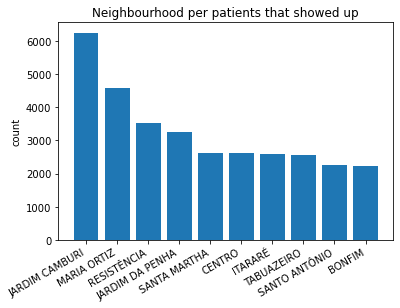

In [13]:
plt.bar(showup_first.Neighbourhood, showup_first.NoShow)
plt.xticks(rotation = 30, ha='right')
plt.ylabel('count')
plt.title('Neighbourhood per patients that showed up')
plt.show()

From the above barchart, the hospital located at "Jardim Camburi" had the highest number of Patients showing up for their appointments followed by "Maria Ortiz". 

In [14]:
df_nshowup_count= df_nshowup.Neighbourhood.value_counts().reset_index(name ='NoShow')
print(df_nshowup_count)

                          index  NoShow
0                JARDIM CAMBURI    1465
1                   MARIA ORTIZ    1219
2                       ITARARÉ     923
3                   RESISTÊNCIA     906
4                        CENTRO     703
..                          ...     ...
75            PONTAL DE CAMBURI      12
76                  ILHA DO BOI       3
77                ILHA DO FRADE       2
78  ILHAS OCEÂNICAS DE TRINDADE       2
79                    AEROPORTO       1

[80 rows x 2 columns]


In [15]:
nshowup_first = df_nshowup_count.head(10)
print(nshowup_first)

               index  NoShow
0     JARDIM CAMBURI    1465
1        MARIA ORTIZ    1219
2            ITARARÉ     923
3        RESISTÊNCIA     906
4             CENTRO     703
5  JESUS DE NAZARETH     696
6    JARDIM DA PENHA     631
7          CARATOÍRA     591
8         TABUAZEIRO     573
9             BONFIM     550


In [16]:
nshowup_first.rename(columns ={'index':'Neighbourhood'}, inplace = True)
nshowup_first.head(3)

C:\Users\Emy\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighbourhood,NoShow
0,JARDIM CAMBURI,1465
1,MARIA ORTIZ,1219
2,ITARARÉ,923


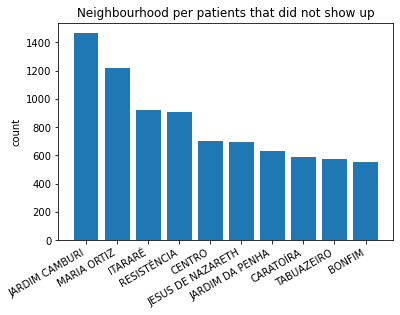

In [17]:
plt.bar(nshowup_first.Neighbourhood, nshowup_first.NoShow)
plt.xticks(rotation = 30, ha='right')
plt.ylabel('count')
plt.title('Neighbourhood per patients that did not show up')
plt.show()

From the above chart, Jardim Camburi still has the highest number of patients that did not show up for their appointments, followed by Maria Ortiz, etc.

We need to find out how many patients that received SMS and how many of them showed up for their appointments.

In [18]:
df_sms= df.loc[df['SMS_received'].isin([1]),['SMS_received','NoShow']]
print(df_sms)

        SMS_received NoShow
11                 1    Yes
15                 1     No
18                 1     No
22                 1    Yes
25                 1     No
...              ...    ...
110522             1     No
110523             1     No
110524             1     No
110525             1     No
110526             1     No

[35482 rows x 2 columns]


From the above output, we see that a total of 35,482 patients received SMS out of 110527 patients.

In [19]:
def barplot(x, hue, data):
    sns.countplot(x='SMS_received', hue='NoShow' , data=df_sms ).set_title('SMS_received per number that showed up')

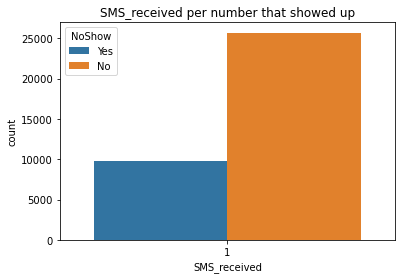

In [20]:
barplot('SMS_received','NoShow', df_sms)

From the above chart, it can be deduced that out of the 35,482 patients that received SMS, about 25000 showed up for their appointments while about 10000 did not show up.

Next, we check the number of patients on scholarship.

In [21]:
df_scholarship=df.loc[df['Scholarship'].isin([1]),['Scholarship','NoShow']]
print(df_scholarship)

        Scholarship NoShow
12                1     No
17                1    Yes
18                1     No
31                1    Yes
33                1     No
...             ...    ...
110423            1     No
110426            1     No
110473            1     No
110479            1    Yes
110482            1    Yes

[10861 rows x 2 columns]


From the above output, 10,861 patients are on scholarship. Lets see how many patients on scholarship that showed up for their appointments. 

In [22]:
def barplot_scholarship(x,hue,data):
    sns.countplot(x='Scholarship', hue='NoShow' , data=df_scholarship).set_title('Scholarship patients')

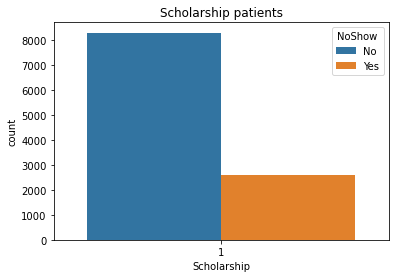

In [23]:
barplot_scholarship('Scholarship', 'NoShow', df_scholarship)

From the barchart above, it can be seen that out of the 10,861 patients that are on scholarship, about 9000 showed up for their appointment.

Let us look at the patients that are not on scholarship and the number that showed up for their appointments.

In [24]:
df_nscholarship=df.loc[df['Scholarship'].isin([0]),['Scholarship','NoShow']]
print(df_nscholarship)

        Scholarship NoShow
0                 0     No
1                 0     No
2                 0     No
3                 0     No
4                 0     No
...             ...    ...
110522            0     No
110523            0     No
110524            0     No
110525            0     No
110526            0     No

[99666 rows x 2 columns]


From the output above 99666 patients are not on scholarship.

In [25]:
def barplot_nscholarship(x,hue,data):
    sns.countplot(x='Scholarship', hue='NoShow' , data=df_nscholarship).set_title('Non scholarship patients')

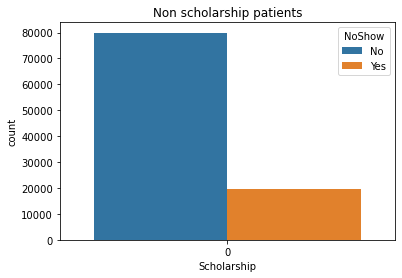

In [26]:
barplot_nscholarship('Scholarship', 'NoShow', df_nscholarship)


Now lets consider the gender of the patiets. Do male patients show up for their appointments more than their female counterparts? The next chart will answer this question.

In [27]:
df_gender_Female=df.loc[df['Gender'].isin(['F']),['Gender','NoShow']]
print(df_gender_Female)

       Gender NoShow
0           F     No
2           F     No
3           F     No
4           F     No
5           F     No
...       ...    ...
110522      F     No
110523      F     No
110524      F     No
110525      F     No
110526      F     No

[71840 rows x 2 columns]


In [28]:
df_gender_Male=df.loc[df['Gender'].isin(['M']),['Gender','NoShow']]
print(df_gender_Male)

       Gender NoShow
1           M     No
11          M    Yes
13          M     No
16          M     No
22          M    Yes
...       ...    ...
110501      M     No
110506      M     No
110509      M     No
110513      M     No
110515      M    Yes

[38687 rows x 2 columns]


Out of the 110527 patients, 71840 were female and 38687 were male.

The next chart show the number of patients that showed up for their appointments according to their gender.

In [29]:
def barplot_gender(x,hue,data):
    sns.countplot(x='NoShow', hue='Gender' , data=df).set_title('Gender of patients that showed up')

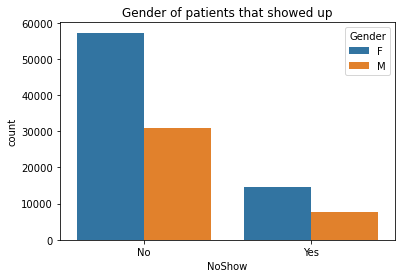

In [30]:
barplot_gender('NoShow', 'Gender', df)

From the above chart, more than 50000 female patients show up for their appointments out of 71840 which is the total population of female patients. About 30000 male patients showed up for their appointments out of 38687 which is the total male population in the dataset. 

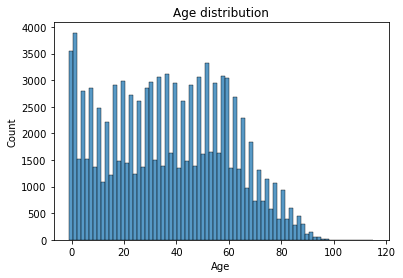

In [37]:
dist = sns.histplot(df.Age).set_title('Age distribution')



The above chart shows the distributuon of the Age of patients in the dataset. Here, it can be seen that majority of the patients were aged between 0 and 60 years.

The 'Non scholarship patients' chart shows that out of the 99666 patients that are not on scholarship, about 80000 showed up for their appointments while about 19000 did not show up for their appointments.

**Conclusion**

After analyzing the No-Show appointment datase, it can be discovered that patients show up for appointments at Jardim Camburi and Maria Ortiz more than other neighborhoods.To answer the first question in the analysis section, Neighborhood, SMS_received  are good indicators in predicting whether a patient will show up for appointments or not.

To answer question 2, we can see from the "Neighborhood per patients that showed up" chart that more patients showed up for appointments at Jardim Camburi and Maria Ortiz than other neighborhoods, but neighbourhood alone cannot be used to predict if patients will show up or not because patients who received SMS tend to show up more than those who did not. 

To answer question 3, comparing the 'Scholarship patients' and the 'Non scholarship patients' chart, Scholarship does not really predict if a patient will show up for an appointment or not.

To answer question 4, looking at the 'Gender of patients that showed up chart' the proportion of male patients that showed up for their appointments tends to be slightly higher compared to that of the females.

**Limitation**

This analysis is only limited to medical appointments in Brazil. The dataset provided does not include data about the address of the patients, their occupation or religion.

**List of websites and books used for this project**

stackoverflow.com
towardsdatascience.com
www.statology.org
seaborn.pydata.org
www.pythoncharts.com

Books
Tutorials Point
Python Data Analytics 